# Linear Regression Project

Context : you just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

PS.: The data is fake.

### Important note:
The point of this project is to explore the basics uses of Linear Regression Models in a data set.

The point of this project is not to clean the data, since the data used is ready to be analyzed.

## Imports for data input and visualization
** Importing pandas, numpy, matplotlib,and seaborn. Then setting %matplotlib inline **

In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 

In [118]:
from matplotlib import style
style.use('seaborn') # personal preference

## Getting the Data

Working with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 


In [8]:
customers = pd.read_csv('Ecommerce Customers')

**Checking the head of customers, and checking out its info() and describe() methods.**

In [9]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [10]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Note:
The 'Time on App' has a mean of 12.05 hours and the 'Time on Website' has a mean of 37.06 hours, both variables have low standard deviations, meaning that this data is somewhat equally distribuid within the data set.

It could be already noted that people in general spent more time on the company's Website than the App.

It could also open a new question: **Knowing that the Website is more used in hours spent than the App, does that reflect in more sales coming from the Website?**

# .

In [119]:
customers.info() # it has 3 qualitative columns and 5 quantitative columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Notes:
The quantitative columns are the ones used for the Linear Regression Model, since **Linear Regression only deals with numerical data**.

Also, it's important to remembrer that the goal in Linear Regression is to minimize the distance between all data and the line, readjusting the position of the line to the best distance

## Exploratory Data Analysis

In [12]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

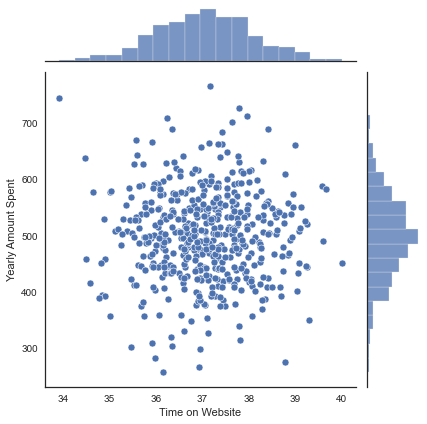

In [117]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data= customers)

### Note:
The is basically no correlation between the Time on Website and Yearly Amount Spent columns, since the dots are really spread out.

# .

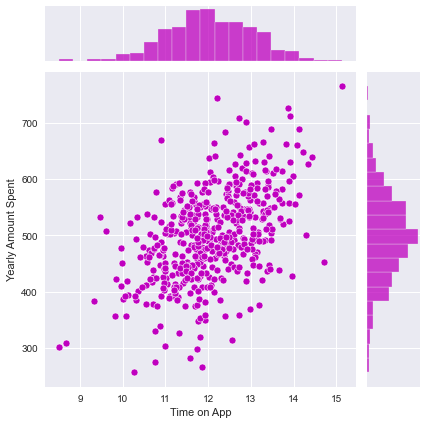

In [114]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data= customers, color='m' )

### Note:
The is somewhat of a linear correlation between the Time on App and Yearly Amount Spent columns, since the dots are not as spread out and are closer to a line form.

Since the data points are 'growing', meaning, the data points are 'building' a line that has a positive inclination, than that correlation is called positive linar correlation (it could be said that if one grows, the other one follows)

# .

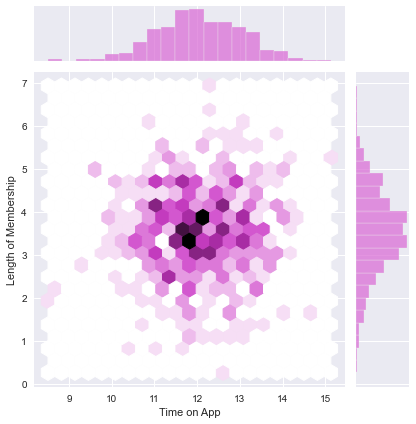

In [115]:
sns.jointplot(x='Time on App', y='Length of Membership', data= customers, color='orchid', kind='hex' )

**Using pairplot to explore the types of relationships across the entire data set**

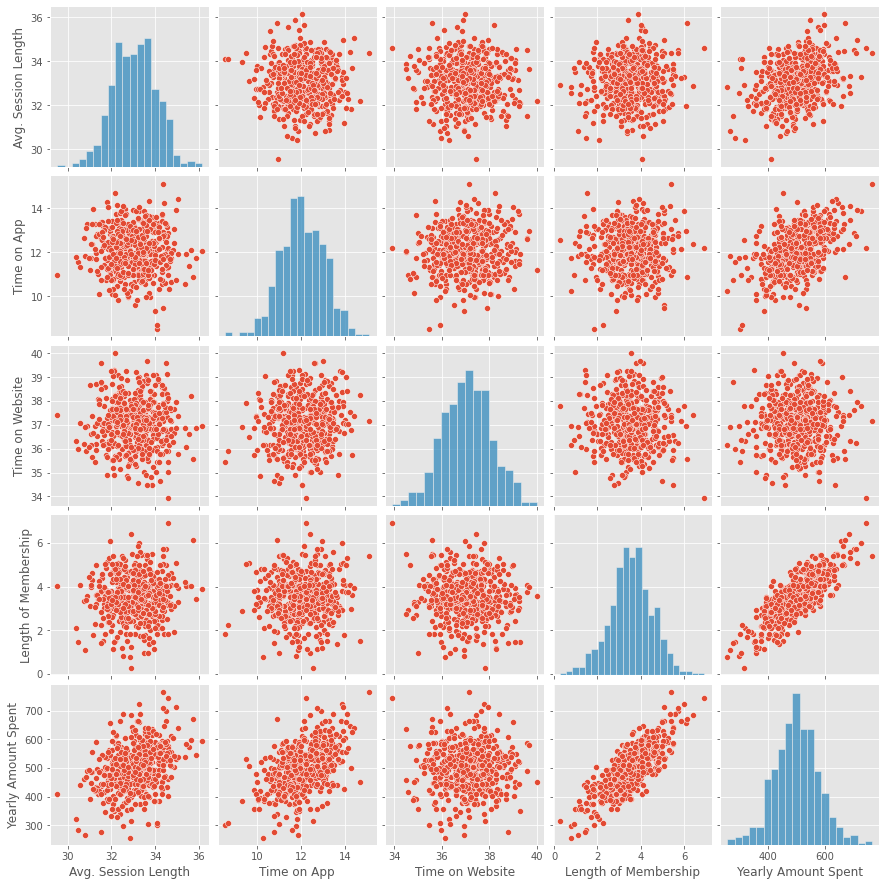

In [26]:
sns.pairplot(customers, palette='pastel', )

**Based off this plot, the most correlated features with Yearly Amount Spent seems to be Length of Membership**

# .

# .

### Creating a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.

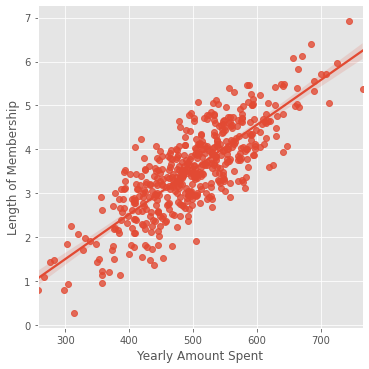

In [97]:
sns.lmplot(x='Yearly Amount Spent', y='Length of Membership', data=customers)

### Note:
The plot shows that the Length of Membership seems to have a good linear fit on the Yearly Amount Spent column.
This could mean that the longer a person stays a member of the company, the more likely this person is to spend more money with the company's products.

# .

## Training and Testing Data

Setting a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.

In [121]:
customers.info() ## remembering what are the numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [123]:
customers.columns ## copying the column names so doesn't return an error.

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

### Importing the sklearn library to do the train and test split ant to import the liner regression model: 

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [51]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [52]:
y = customers['Yearly Amount Spent']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training the Model

**Creating an instance of a LinearRegression() model named lm.**

In [73]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [74]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Printing out the coefficients of the model**

In [75]:
print('Coefficients:')
print(lm.coef_)

Coefficients:
[25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
Evaluating the performance of the model by predicting off the test values.

In [84]:
predictions = lm.predict(X_test)

#### Creating a scatterplot of the real test values versus the predicted values. 

Text(0, 0.5, 'Predicted Y')

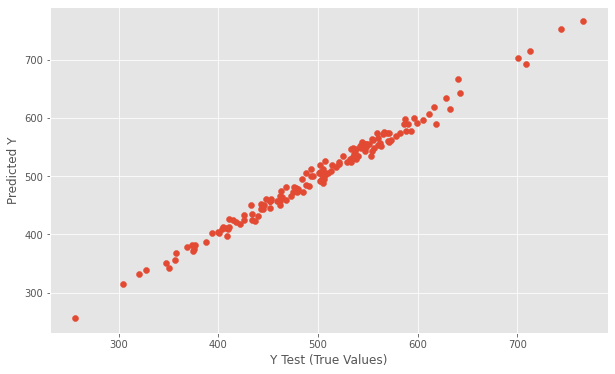

In [109]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Y')

### Note:
The model has a great prediction based on the real values, because as it shows on the plot: the closer to a line, the best the predictions are.

## Evaluating the Model

Evaluate the model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [125]:
from sklearn import metrics

In [126]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430834
MSE: 79.81305165097453
RMSE: 8.933815066978639


In [127]:
metrics.explained_variance_score(y_test, predictions)

0.9890771231889606

## Residuals

Explore the residuals to make sure everything was okay with our data. 

**Plotting a histogram of the residuals and make sure it looks normally distributed.**

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

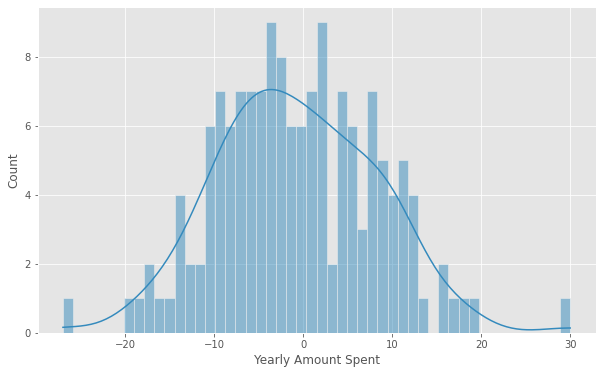

In [111]:
plt.figure(figsize=(10,6))
sns.histplot((y_test - predictions), bins=50, kde=True)

## Conclusion
Do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.


In [128]:
df_coef = pd.DataFrame(lm.coef_, X.columns,columns=['Coefficient'])
df_coef

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of \$25.98 ** in Yearly Amount Spent.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of \$38.59 ** in Yearly Amount Spent.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of \$0.19 ** in Yearly Amount Spent.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of \$61.28 ** in Yearly Amount Spent.

### This shows that, even that the time spent on de Website is greater than the time spent on the App, the App returns a revenue 190 bigger the Wesite

**Do you think the company should focus more on their mobile app or on their website?**

There are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!